In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as st
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [3]:
data2017 = pd.read_excel("PERM_Disclosure_Data_FY17.xlsx")
data2016 = pd.read_excel("PERM_Disclosure_Data_FY16.xlsx")
data2015 = pd.read_excel("PERM_Disclosure_Data_FY15_Q4.xlsx")

In [4]:
#Change the column names so they match between years
data2016 = data2016.rename(columns = {'FW_INFO_REL_OCCUP_EXPERIENCE':'FW_INFO_REL_OCCUP_EXP'})
data2015 = data2015.rename(columns = {'JI_FOREIGN_WORKER_LIVE_ON_PREMISES':'JI_FW_LIVE_ON_PREMISES'})
data2015 = data2015.rename(columns = {'REC_INFO_BARG_REP_NOTIFIED':'RECR_INFO_BARG_REP_NOTIFIED'})
data2015 = data2015.rename(columns = {'JI_OFFERED_TO_SEC_J_FOREIGN_WORKER':'JI_OFFERED_TO_SEC_J_FW'})
data2017 = data2017.rename(columns = {'PW_JOB_TITLE_9089':'PW_Job_Title_9089'})

In [5]:
dataList = [data2017, data2016, data2015]
originalData = pd.concat(dataList)

In [6]:
df = originalData.copy()

In [7]:
#DROP WITHRAWN FROM CASE_STATUS
df = df[df['CASE_STATUS'] != 'Withdrawn']

COLUMNS TO KEEP

In [8]:
df = df[['CASE_STATUS', 'REFILE','SCHD_A_SHEEPHERDER','FW_OWNERSHIP_INTEREST'
         ,'JOB_INFO_TRAINING','JOB_INFO_EXPERIENCE','JOB_INFO_FOREIGN_LANG_REQ'
         ,'JI_OFFERED_TO_SEC_J_FW','RECR_INFO_COLL_TEACH_COMP_PROC'
         ,'RI_COLL_TCH_BASIC_PROCESS','RECR_INFO_SUNDAY_NEWSPAPER','RECR_INFO_EMPLOYER_REC_PAYMENT'
         ,'RI_POSTED_NOTICE_AT_WORKSITE','RI_LAYOFF_IN_PAST_SIX_MONTHS','RI_US_WORKERS_CONSIDERED'
         ,'FW_INFO_TRAINING_COMP','FW_INFO_REQ_EXPERIENCE','FW_INFO_ALT_EDU_EXPERIENCE'
         ,'FW_INFO_REL_OCCUP_EXP','PREPARER_INFO_EMP_COMPLETED','RECR_INFO_BARG_REP_NOTIFIED']]

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

FORMAT BINARY DUMMY COLUMNS

In [9]:
#INSERT BINARY CASE STATUS COLUMN
caseStatusLoc = df.columns.get_loc('CASE_STATUS')
df.insert(caseStatusLoc + 1, 'caseStatusBinary',value = 0)

#BINARY CASE STATUS
df['CASE_STATUS'] = df['CASE_STATUS'].astype(str) 
df['caseStatusBinary'] = np.where(df['CASE_STATUS'] == "Denied", 0, 1)

In [10]:
#INSERT BINARY REFILE
refileLoc = df.columns.get_loc('REFILE')
df.insert(refileLoc + 1, 'refileBinary',value = 0)

#BINARY REFILE
df['REFILE'] = df['REFILE'].astype(str) 
df['refileBinary'] = np.where(df['REFILE'] == "Y", 1, 0)

In [11]:
#INSERT BINARY SCH_A_SHEEPHERDER
loc = df.columns.get_loc('SCHD_A_SHEEPHERDER')
df.insert(loc + 1, 'sheepBinary',value = 0)

#BINARY FW_OWNERSHIP_INTEREST
df['SCHD_A_SHEEPHERDER'] = df['SCHD_A_SHEEPHERDER'].astype(str) 
df['sheepBinary'] = np.where(df['SCHD_A_SHEEPHERDER'] == "Y", 1, 0)

In [12]:
#INSERT BINARY SFW_OWNERSHIP_INTEREST
loc = df.columns.get_loc('FW_OWNERSHIP_INTEREST')
df.insert(loc + 1, 'fwOwnershipInterestBinary',value = 0)

#BINARY FW_OWNERSHIP_INTEREST
df['FW_OWNERSHIP_INTEREST'] = df['FW_OWNERSHIP_INTEREST'].astype(str) 
df['fwOwnershipInterestBinary'] = np.where(df['FW_OWNERSHIP_INTEREST'] == "Y", 1, 0)

In [13]:
#INSERT BINARY JOB_INFO_TRAINING
loc = df.columns.get_loc('JOB_INFO_TRAINING')
df.insert(loc + 1, 'jobTrainBinary',value = 0)

#BINARY JOB_INFO_TRAINING
df['JOB_INFO_TRAINING'] = df['JOB_INFO_TRAINING'].astype(str) 
df['jobTrainBinary'] = np.where(df['JOB_INFO_TRAINING'] == "Y", 1, 0)

In [14]:
#INSERT BINARY JOB_INFO_EXPERIENCE
loc = df.columns.get_loc('JOB_INFO_EXPERIENCE')
df.insert(loc + 1, 'jobExpBinary',value = 0)

#BINARY JOB_INFO_TRAINING
df['JOB_INFO_EXPERIENCE'] = df['JOB_INFO_EXPERIENCE'].astype(str) 
df['jobExpBinary'] = np.where(df['JOB_INFO_EXPERIENCE'] == "Y", 1, 0)

In [15]:
#INSERT BINARY JOB_INFO_EXPERIENCE
loc = df.columns.get_loc('JOB_INFO_FOREIGN_LANG_REQ')
df.insert(loc + 1, 'jobForeignLangBinary',value = 0)

#BINARY JOB_INFO_TRAINING
df['JOB_INFO_FOREIGN_LANG_REQ'] = df['JOB_INFO_FOREIGN_LANG_REQ'].astype(str) 
df['jobForeignLangBinary'] = np.where(df['JOB_INFO_FOREIGN_LANG_REQ'] == "Y", 1, 0)

In [16]:
#INSERT BINARY JI_OFFERED_TO_SEC_J_FOREIGN_WORKER
loc = df.columns.get_loc('JI_OFFERED_TO_SEC_J_FW')
df.insert(loc + 1, 'jobOfferedForeignBinary',value = 0)

#BINARY JI_OFFERED_TO_SEC_J_FOREIGN_WORKER
df['JI_OFFERED_TO_SEC_J_FW'] = df['JI_OFFERED_TO_SEC_J_FW'].astype(str) 
df['jobOfferedForeignBinary'] = np.where(df['JI_OFFERED_TO_SEC_J_FW'] == "Y", 1, 0)

In [17]:
#INSERT BINARY RECR_INFO_COLL_TEACH_COMP_PROC
loc = df.columns.get_loc('RECR_INFO_COLL_TEACH_COMP_PROC')
df.insert(loc + 1, 'competitiveRecBin',value = 0)

#BINARY JI_OFFERED_TO_SEC_J_FOREIGN_WORKER
df['RECR_INFO_COLL_TEACH_COMP_PROC'] = df['RECR_INFO_COLL_TEACH_COMP_PROC'].astype(str) 
df['competitiveRecBin'] = np.where(df['RECR_INFO_COLL_TEACH_COMP_PROC'] == "Y", 1, 0)

In [18]:
#INSERT BINARY RI_COLL_TCH_BASIC_PROCESS
loc = df.columns.get_loc('RI_COLL_TCH_BASIC_PROCESS')
df.insert(loc + 1, 'basicRecProcessLocBin',value = 0)

#BINARY RI_COLL_TCH_BASIC_PROCESS
df['RI_COLL_TCH_BASIC_PROCESS'] = df['RI_COLL_TCH_BASIC_PROCESS'].astype(str) 
df['basicRecProcessLocBin'] = np.where(df['RI_COLL_TCH_BASIC_PROCESS'] == "Y", 1, 0)

In [19]:
#INSERT BINARY RECR_INFO_SUNDAY_NEWSPAPER
loc = df.columns.get_loc('RECR_INFO_SUNDAY_NEWSPAPER')
df.insert(loc + 1, 'sundayNewsBin',value = 0)

#BINARY RECR_INFO_SUNDAY_NEWSPAPER
df['RECR_INFO_SUNDAY_NEWSPAPER'] = df['RECR_INFO_SUNDAY_NEWSPAPER'].astype(str) 
df['sundayNewsBin'] = np.where(df['RECR_INFO_SUNDAY_NEWSPAPER'] == "Y", 1, 0)

In [20]:
#INSERT BINARY RECR_INFO_EMPLOYER_REC_PAYMENT
loc = df.columns.get_loc('RECR_INFO_EMPLOYER_REC_PAYMENT')
df.insert(loc + 1, 'reqcquirePaymentBin',value = 0)

#BINARY RECR_INFO_EMPLOYER_REC_PAYMENT
df['RECR_INFO_EMPLOYER_REC_PAYMENT'] = df['RECR_INFO_EMPLOYER_REC_PAYMENT'].astype(str) 
df['reqcquirePaymentBin'] = np.where(df['RECR_INFO_EMPLOYER_REC_PAYMENT'] == "Y", 1, 0)

In [21]:
#INSERT BINARY RI_POSTED_NOTICE_AT_WORKSITE
loc = df.columns.get_loc('RI_POSTED_NOTICE_AT_WORKSITE')
df.insert(loc + 1, 'postedNoticeBin',value = 0)

#BINARY RI_POSTED_NOTICE_AT_WORKSITE
df['RI_POSTED_NOTICE_AT_WORKSITE'] = df['RI_POSTED_NOTICE_AT_WORKSITE'].astype(str) 
df['postedNoticeBin'] = np.where(df['RI_POSTED_NOTICE_AT_WORKSITE'] == "Y", 1, 0)

In [22]:
#INSERT BINARY RI_LAYOFF_IN_PAST_SIX_MONTHS
loc = df.columns.get_loc('RI_LAYOFF_IN_PAST_SIX_MONTHS')
df.insert(loc + 1, 'layoffBin',value = 0)

#BINARY RI_LAYOFF_IN_PAST_SIX_MONTHS
df['RI_LAYOFF_IN_PAST_SIX_MONTHS'] = df['RI_LAYOFF_IN_PAST_SIX_MONTHS'].astype(str) 
df['layoffBin'] = np.where(df['RI_LAYOFF_IN_PAST_SIX_MONTHS'] == "Y", 1, 0)

In [23]:
#INSERT BINARY RI_US_WORKERS_CONSIDERED
loc = df.columns.get_loc('RI_US_WORKERS_CONSIDERED')
df.insert(loc + 1, 'layoffWorkersNotifiedBin',value = 0)

#BINARY RI_US_WORKERS_CONSIDERED
df['RI_US_WORKERS_CONSIDERED'] = df['RI_US_WORKERS_CONSIDERED'].astype(str) 
df['layoffWorkersNotifiedBin'] = np.where(df['RI_US_WORKERS_CONSIDERED'] == "Y", 1, 0)

In [24]:
#INSERT BINARY FW_INFO_TRAINING_COMP
loc = df.columns.get_loc('FW_INFO_TRAINING_COMP')
df.insert(loc + 1, 'trainCompBin',value = 0)

#BINARY FW_INFO_TRAINING_COMP
df['FW_INFO_TRAINING_COMP'] = df['FW_INFO_TRAINING_COMP'].astype(str) 
df['trainCompBin'] = np.where(df['FW_INFO_TRAINING_COMP'] == "Y", 1, 0)

In [25]:
#INSERT BINARY FW_INFO_REQ_EXPERIENCE
loc = df.columns.get_loc('FW_INFO_REQ_EXPERIENCE')
df.insert(loc + 1, 'hasReqExpBin',value = 0)

#BINARY FW_INFO_REQ_EXPERIENCE
df['FW_INFO_REQ_EXPERIENCE'] = df['FW_INFO_REQ_EXPERIENCE'].astype(str) 
df['hasReqExpBin'] = np.where(df['FW_INFO_REQ_EXPERIENCE'] == "Y", 1, 0)

In [26]:
#INSERT BINARY FW_INFO_ALT_EDU_EXPERIENCE
loc = df.columns.get_loc('FW_INFO_ALT_EDU_EXPERIENCE')
df.insert(loc + 1, 'hasAltExpBin',value = 0)

#BINARY FW_INFO_ALT_EDU_EXPERIENCE
df['FW_INFO_ALT_EDU_EXPERIENCE'] = df['FW_INFO_ALT_EDU_EXPERIENCE'].astype(str) 
df['hasAltExpBin'] = np.where(df['FW_INFO_ALT_EDU_EXPERIENCE'] == "Y", 1, 0)

In [27]:
#INSERT BINARY PREPARER_INFO_EMP_COMPLETED
loc = df.columns.get_loc('PREPARER_INFO_EMP_COMPLETED')
df.insert(loc + 1, 'employerComBin',value = 0)

#BINARY PREPARER_INFO_EMP_COMPLETED
df['PREPARER_INFO_EMP_COMPLETED'] = df['PREPARER_INFO_EMP_COMPLETED'].astype(str) 
df['employerComBin'] = np.where(df['PREPARER_INFO_EMP_COMPLETED'] == "Y", 1, 0)

In [28]:
#INSERT BINARY RECR_INFO_BARG_REP_NOTIFIED
loc = df.columns.get_loc('RECR_INFO_BARG_REP_NOTIFIED')
df.insert(loc + 1, 'barRepNotifiedBin',value = 0)

#BINARY RECR_INFO_BARG_REP_NOTIFIED
df['RECR_INFO_BARG_REP_NOTIFIED'] = df['RECR_INFO_BARG_REP_NOTIFIED'].astype(str) 
df['barRepNotifiedBin'] = np.where(df['RECR_INFO_BARG_REP_NOTIFIED'] == "Y", 1, 0)

#FORMAT COLUMNS
#LOWER CASE 
#REMOVE SPECIAL CHARS
#WAGE IS CONVERTED FROM OBJECT TO FLOAT AND REMOVES ',' CHARS

df['CASE_STATUS'] = df['CASE_STATUS'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

df['EMPLOYER_CITY'] = df['EMPLOYER_CITY'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

df['EMPLOYER_STATE'] = df['EMPLOYER_STATE'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

df['EMPLOYER_NUM_EMPLOYEES'].sort_values(ascending = False)

df['EMPLOYER_YR_ESTAB'].sort_values(ascending = False)

df['PW_AMOUNT_9089'].astype(str).str.replace(',','').apply(float).sort_values(ascending = False)

df['AGENT_FIRM_NAME'] = df['AGENT_FIRM_NAME'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

df['EMPLOYER_CITY'] = df['EMPLOYER_CITY'].astype(str).str.lower().str.replace('[^A-Za-z\s]+', '')

df['PW_LEVEL_9089'] = df['PW_LEVEL_9089'].astype(str).str.lower().str.replace('[^A-Za-z\s]+','')

In [ ]:
#EXPLORE EACH COLUMN

df['CASE_STATUS'].value_counts()

df['EMPLOYER_CITY'].value_counts().sort_values(ascending = False)

df['EMPLOYER_NUM_EMPLOYEES'].value_counts().sort_values(ascending = False)

df['EMPLOYER_YR_ESTAB'].value_counts().sort_values(ascending = False)

df['AGENT_FIRM_NAME'].value_counts().sort_values(ascending = False)

df['AGENT_STATE'].value_counts().sort_values(ascending = False)

df['CLASS_OF_ADMISSION'].value_counts().sort_values(ascending = False)

df['PW_AMOUNT_9089'].sort_values(ascending = False)

df['PW_LEVEL_9089'].value_counts().sort_values(ascending = False)

In [ ]:
#SOME ANALYSIS

df.groupby(['COUNTRY_OF_CITIZENSHIP'])['COUNTRY_OF_CITIZENSHIP'].count() 

casePercentByFirm = df.groupby(['CASE_STATUS','AGENT_FIRM_NAME'])['CASE_STATUS'].count() / df.groupby(['AGENT_FIRM_NAME'])['AGENT_FIRM_NAME'].count() 

casePercentByFirm

casePercentByCitizenship = df.groupby(['CASE_STATUS','COUNTRY_OF_CITIZENSHIP'])['CASE_STATUS'].count() / df.groupby(['COUNTRY_OF_CITIZENSHIP'])['COUNTRY_OF_CITIZENSHIP'].count() 
casePercentByCitizenship

df['COUNTRY_OF_CITIZENSHIP'].value_counts()>500

df['CASE_STATUS'].value_counts().plot(kind="bar")

df['PW_LEVEL_9089'].value_counts().plot(kind="bar")

df['EMPLOYER_YR_ESTAB'].plot.box(figsize=(20,20))

df.groupby(['CASE_STATUS','AGENT_FIRM_NAME'])['CASE_STATUS'].count().sort_values(ascending=False)

df.insert(pwLvlIndex + 1, 'PW_LEVEL_1',value = 0)
df.insert(pwLvlIndex + 2, 'PW_LEVEL_2',value = 0)
df.insert(pwLvlIndex + 3, 'PW_LEVEL_3',value = 0)
df.insert(pwLvlIndex + 4, 'PW_LEVEL_4',value = 0)


daysAdvertisedEmployerWebsite = (df['RI_EMPLOYER_WEB_POST_TO']-df['RI_EMPLOYER_WEB_POST_FROM']).dt.days
columnPos = df.columns.get_loc("RI_EMPLOYER_WEB_POST_FROM") + 1
df.insert(columnPos,'daysAdvertisedEmployerWebsite', daysAdvertisedEmployerWebsite)


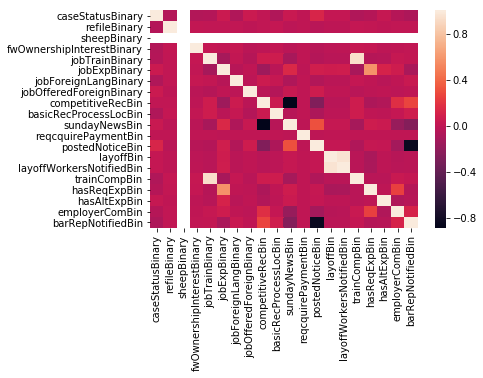

In [62]:
sns.heatmap(df.corr())
plt.show()

In [52]:
data = list(set(df) - set(data2017))
test = df[data]


data.remove('caseStatusBinary')
data.insert(0,'caseStatusBinary')
print(data)

test = df[data]

['caseStatusBinary', 'hasReqExpBin', 'trainCompBin', 'basicRecProcessLocBin', 'competitiveRecBin', 'jobForeignLangBinary', 'sundayNewsBin', 'layoffBin', 'jobTrainBinary', 'reqcquirePaymentBin', 'hasAltExpBin', 'sheepBinary', 'jobOfferedForeignBinary', 'layoffWorkersNotifiedBin', 'postedNoticeBin', 'jobExpBinary', 'fwOwnershipInterestBinary', 'refileBinary', 'employerComBin', 'barRepNotifiedBin']


In [53]:
test.fillna(0,inplace = True)
test

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,caseStatusBinary,hasReqExpBin,trainCompBin,basicRecProcessLocBin,competitiveRecBin,jobForeignLangBinary,sundayNewsBin,layoffBin,jobTrainBinary,reqcquirePaymentBin,hasAltExpBin,sheepBinary,jobOfferedForeignBinary,layoffWorkersNotifiedBin,postedNoticeBin,jobExpBinary,fwOwnershipInterestBinary,refileBinary,employerComBin,barRepNotifiedBin
11,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
12,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0
13,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
14,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
15,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
16,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
18,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
19,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
20,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0


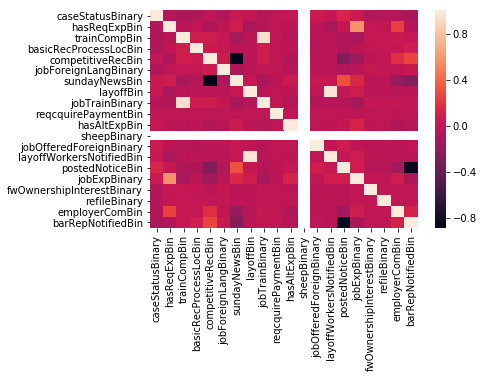

In [54]:
sns.heatmap(test.corr())
plt.show()

In [55]:
X = test.iloc[:,1:]
y = test.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [56]:
X_train.shape

(225339, 19)

In [57]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
coef = classifier.coef_[0]
print (coef)

[-1.10093704 -0.95709918 -1.57030075  2.53365058 -0.93258391  1.28332105
  0.11409723  0.43169834  0.31165948  0.33384707  0.          3.14858458
  0.21205404  2.12459807  1.13252262 -1.31465905 -2.20442398 -0.17823323
  0.46995359]


In [58]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  178  4290]
 [   37 70608]]


In [59]:
print('Accuracy of logistic regression classifier on test set: {:.9f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.942393461


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.04      0.08      4468
          1       0.94      1.00      0.97     70645

avg / total       0.94      0.94      0.92     75113



In [ ]:
daysAvertisedCampus = df['RECR_INFO_ON_CAMPUS_RECR_TO'].sub(Data_2017['RECR_INFO_ON_CAMPUS_RECR_FROM'])

In [ ]:
daysAdvertisedJobBoard = df['RI_JOB_SEARCH_WEBSITE_TO'].sub(Data_2017['RI_JOB_SEARCH_WEBSITE_FROM']) 

In [ ]:
pd.DatetimeIndex(data2017Copy['RI_EMPLOYER_WEB_POST_TO']).month